In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_parquet('yellow_taxis_final_yellow_taxis_transformado_merged1.parquet')
df.describe()



,PULocationID,DOLocationID,trip_miles,trip_time,tips,passenger_count,payment_type,total_fare
count,2.750106e+07,2.750106e+07,2.750106e+07,2.750106e+07,2.750106e+07,2.750106e+07,2.750106e+07,2.750106e+07
mean,1.644001e+02,1.627727e+02,3.367772e+00,1.041107e+03,2.784771e+00,1.472437e+00,1.243032e+00,2.086696e+01
std,6.497179e+01,7.015249e+01,1.008483e+02,3.424228e+03,3.463066e+00,1.029294e+00,4.647517e-01,1.723943e+01
min,1.000000e+00,1.000000e+00,-1.352000e+01,-8.230820e+05,0.000000e+00,1.000000e+00,1.000000e+00,-5.551115e-17
25%,1.320000e+02,1.130000e+02,1.020000e+00,4.230000e+02,0.000000e+00,1.000000e+00,1.000000e+00,1.180000e+01
50%,1.620000e+02,1.620000e+02,1.730000e+00,7.020000e+02,2.150000e+00,1.000000e+00,1.000000e+00,1.570000e+01
75%,2.340000e+02,2.340000e+02,3.230000e+00,1.147000e+03,3.550000e+00,2.000000e+00,1.000000e+00,2.230000e+01
max,2.650000e+02,2.650000e+02,1.403852e+05,4.278920e+05,1.140440e+03,9.000000e+00,5.000000e+00,6.997850e+03


En la descripción previa observamos valores extremos (máximos y mínimos) bastante llamativos, lo cual podría indicar la existencia de outliers en las columnas trip_miles, trip_time y total_fare.
A continuación efectuaremos algunos análisis que nos ayudarán a establecer los criterios necesarios para filtrarlos.
La tarifa mínima a cobrar cuando tomamos un taxi amarillo en la ciudad de Nueva York es de 3 dólares, por lo cual eliminaremos todos aquellos registros con tarifas menores.
A partir de allí debemos sumar 70 centavos por cada quinto de milla recorrida (https://www.nyc.gov/site/tlc/passengers/taxi-fare.page). Por lo cual filtraremos todos aquellos valores que tengan trip_miles menores a 0,2 millas.
Los registros con viajes en disputa (payment_type = 4) en su gran mayoría contienen valores espejados de tarifa cobrada. Es decir, un viaje donde se facturó un monto X y luego otro donde se facturó el monto -X. En ambos casos el monto final a cobrar fue de $0. Eliminaremos también estos registros.
Adicionalmente eliminaremos aquellos registros con duración de viaje negativos.

In [3]:
# Filtramos para cobros mayores a la tarifa mínima ($ 3) y también eliminamos los registros con disputa (payment type = 4). 
# Filtramos tiempos de viaje negativos y millaje inferior a 0,2 millas.

df = df[(df['payment_type'] != 4) & (df['total_fare'] > 3)]
df = df[(df['trip_time'] > 0) & (df['trip_miles'] > 0.2)]

df.reset_index(inplace=True, drop=True)

Ahora comenzaremos analizando la columna total_fare para limitar el valor máximo a incluir en nuestra tabla.

whiskers
[11.80000019  3.0999999 ]
[22.29999924 38.04999924]
caps
[3.1 3.1]
[38.05 38.05]
boxes
[11.80000019 11.80000019 22.29999924 22.29999924 11.80000019]
medians
[15.80000019 15.80000019]
fliers
[52.56 58.56 58.56 ... 89.08 43.   42.  ]
means


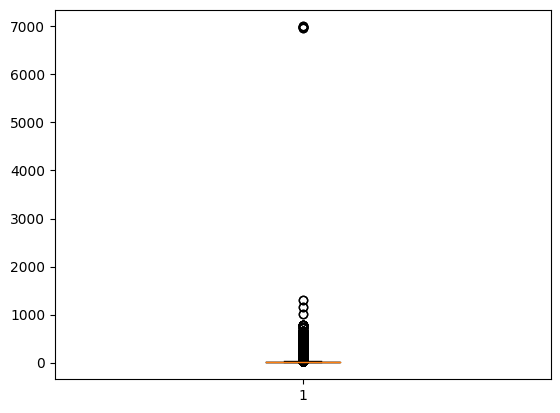

In [4]:
# Hacemos un boxplot de total_fare e imprimimos sus parámetros
boxplot = plt.boxplot(df['total_fare'])
for i in ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']:
    print(i)
    for line in boxplot[i]:
        print(line.get_ydata())



whiskers
[11.80000019  3.0999999 ]
[22.29999924 38.04999924]
caps
[3.1 3.1]
[38.05 38.05]
boxes
[11.80000019 11.80000019 22.29999924 22.29999924 11.80000019]
medians
[15.80000019 15.80000019]
fliers
[52.56 58.56 58.56 ... 89.08 43.   42.  ]
means


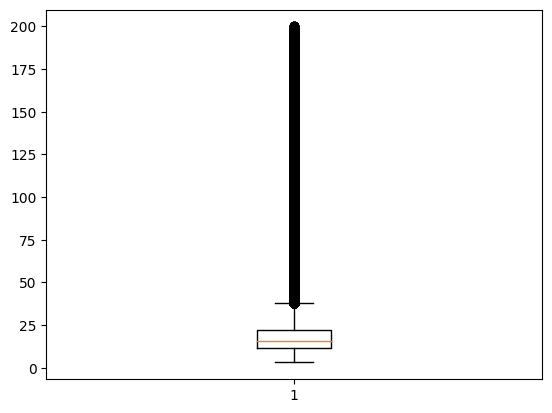

In [5]:
# Para analizar mejor qué sucede en el gráfico, nos limitamos a ver los valores inferiores a 200
df1 = df[df['total_fare'] < 200]
boxplot = plt.boxplot(df1['total_fare'])
for i in ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']:
    print(i)
    for line in boxplot[i]:
        print(line.get_ydata())


Continuaremos ahora con el análisis de trip_miles.

whiskers
[1.07000005 0.20999999]
[3.29999995 6.63999987]
caps
[0.21 0.21]
[6.64 6.64]
boxes
[1.07000005 1.07000005 3.29999995 3.29999995 1.07000005]
medians
[1.77999997 1.77999997]
fliers
[ 6.93  6.8   6.8  ... 17.84  9.5  10.2 ]
means


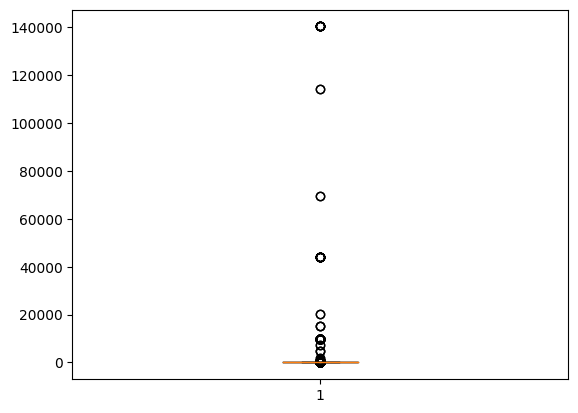

In [6]:
# Hacemos un boxplot de trip_miles e imprimimos sus parámetros
boxplot = plt.boxplot(df['trip_miles'])
for i in ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']:
    print(i)
    for line in boxplot[i]:
        print(line.get_ydata())

whiskers
[1.07000005 0.20999999]
[3.29999995 6.63999987]
caps
[0.21 0.21]
[6.64 6.64]
boxes
[1.07000005 1.07000005 3.29999995 3.29999995 1.07000005]
medians
[1.77999997 1.77999997]
fliers
[ 6.93  6.8   6.8  ... 17.84  9.5  10.2 ]
means


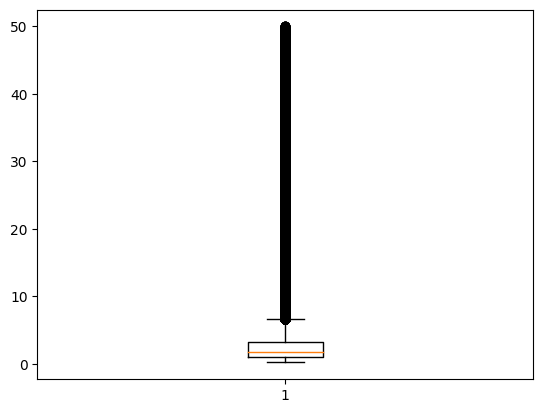

In [7]:
# Para analizar mejor qué sucede en el gráfico, nos limitamos a ver los valores inferiores a 50
df1 = df[df['trip_miles'] < 50]
boxplot = plt.boxplot(df1['trip_miles'])
for i in ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']:
    print(i)
    for line in boxplot[i]:
        print(line.get_ydata())


Finalizamos analizando la columna trip_time.

whiskers
[433.   1.]
[1153. 2233.]
caps
[1 1]
[2233 2233]
boxes
[ 433.  433. 1153. 1153.  433.]
medians
[710. 710.]
fliers
[82822 83358 86220 ...  3628  2407  5480]
means


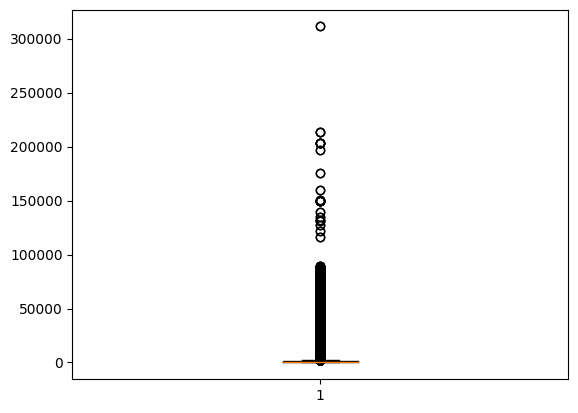

In [8]:
# Hacemos un boxplot de trip_time e imprimimos sus parámetros
boxplot = plt.boxplot(df['trip_time'])
for i in ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']:
    print(i)
    for line in boxplot[i]:
        print(line.get_ydata())

whiskers
[432.   1.]
[1149. 2224.]
caps
[1 1]
[2224 2224]
boxes
[ 432.  432. 1149. 1149.  432.]
medians
[709. 709.]
fliers
[2498 2322 2285 ... 3628 2407 5480]
means


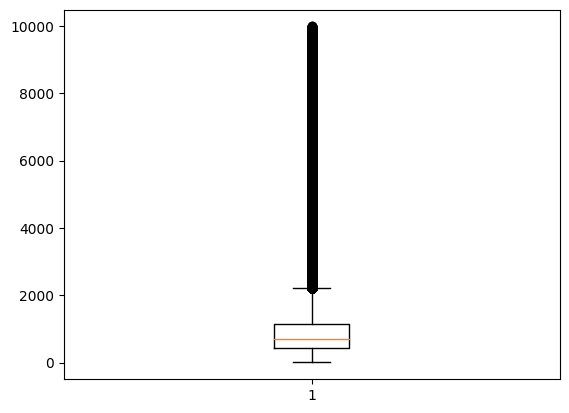

In [9]:
# Para analizar mejor qué sucede en el gráfico, nos limitamos a ver los valores inferiores a 10000
df1 = df[df['trip_time'] < 10000]
boxplot = plt.boxplot(df1['trip_time'])
for i in ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']:
    print(i)
    for line in boxplot[i]:
        print(line.get_ydata())

En virtud de los valores observados, tanto en los diagramas de caja como en los resultados observados en el 'describe()' inicial de nuestro análisis, definimos las siguientes restricciones para filtrar nuestros datos:

* 200 > 'total_fare' >= 3 (dólares norteamericanos)

* 50 > 'trip_miles' >= 0.2 (millas)

* 5000 > 'trip_time' >= 100 (segundos)



In [10]:
# Filtros

df = df[(df['total_fare'] >= 3) & (df['total_fare'] < 200)]
df = df[(df['trip_miles'] >= 0.2) & (df['trip_miles'] < 50)]
df = df[(df['trip_time'] >= 100) & (df['trip_time'] < 5000)]
df.reset_index(inplace=True, drop=True)



In [11]:
df.reset_index(inplace=True, drop=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26706731 entries, 0 to 26706730
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PUDate           object 
 1   PUTime           object 
 2   PULocationID     int32  
 3   PUBorough        object 
 4   PUZone           object 
 5   DODate           object 
 6   DOTime           object 
 7   DOLocationID     int32  
 8   DOBorough        object 
 9   DOZone           object 
 10  trip_miles       float32
 11  trip_time        int32  
 12  tips             float32
 13  passenger_count  int32  
 14  payment_type     int32  
 15  total_fare       float32
dtypes: float32(3), int32(5), object(8)
memory usage: 2.4+ GB
